In [39]:
#importing necessary paccages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

In [27]:
#Loading data
df = pd.read_csv('Sentiment.csv')
df= df.drop(columns=['candidate','candidate_confidence','relevant_yn','relevant_yn_confidence','subject_matter','subject_matter_confidence','candidate_gold','relevant_yn_gold','sentiment_gold','subject_matter_gold','tweet_coord','tweet_created'])
df.head()

id sentiment  sentiment_confidence             name  retweet_count  \
0   1   Neutral                0.6578       I_Am_Kenzi              5   
1   2  Positive                0.6333    PeacefulQuest             26   
2   3   Neutral                0.6629    PussssyCroook             27   
3   4  Positive                1.0000  MattFromTexas31            138   
4   5  Positive                0.7045       sharonDay5            156   

                                                text            tweet_id  \
0  RT @NancyLeeGrahn: How did everyone feel about...  629697200650592256   
1  RT @ScottWalker: Didn't catch the full #GOPdeb...  629697199560069120   
2  RT @TJMShow: No mention of Tamir Rice and the ...  629697199312482304   
3  RT @RobGeorge: That Carly Fiorina is trending ...  629697197118861312   
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  629697196967903232   

  tweet_location               user_timezone  
0            NaN                       Quito  
1            NaN                         NaN  
2            NaN                         NaN  
3          Texas  Central Time (US & Canada)  
4            NaN                     Arizona

In [28]:
#DATA PREPROCESSING

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
# Load the dataset
df = pd.read_csv("Sentiment.csv")

# Display the first few rows of the dataset
print(df.head())

# Data Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove emojis
    text = re.sub(r'😊|😂|❤️|👍|😍|😎|😢|😭|🤔|🔥|💯|👏|🙌|👌|😱|😜|😋|😅', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    
    # Remove punctuation
    words = [word for word in words if word.isalnum()]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

# Apply the preprocessing function to the 'text' column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   id               candidate  candidate_confidence relevant_yn  \
0   1  No candidate mentioned                   1.0         yes   
1   2            Scott Walker                   1.0         yes   
2   3  No candidate mentioned                   1.0         yes   
3   4  No candidate mentioned                   1.0         yes   
4   5            Donald Trump                   1.0         yes   

   relevant_yn_confidence sentiment  sentiment_confidence     subject_matter  \
0                     1.0   Neutral                0.6578  None of the above   
1                     1.0  Positive                0.6333  None of the above   
2                     1.0   Neutral                0.6629  None of the above   
3                     1.0  Positive                1.0000  None of the above   
4                     1.0  Positive                0.7045  None of the above   

   subject_matter_confidence candidate_gold  ... relevant_yn_gold  \
0                     1.0000            NaN  ..

id               candidate  candidate_confidence relevant_yn  \
0   1  No candidate mentioned                   1.0         yes   
1   2            Scott Walker                   1.0         yes   
2   3  No candidate mentioned                   1.0         yes   
3   4  No candidate mentioned                   1.0         yes   
4   5            Donald Trump                   1.0         yes   

   relevant_yn_confidence sentiment  sentiment_confidence     subject_matter  \
0                     1.0   Neutral                0.6578  None of the above   
1                     1.0  Positive                0.6333  None of the above   
2                     1.0   Neutral                0.6629  None of the above   
3                     1.0  Positive                1.0000  None of the above   
4                     1.0  Positive                0.7045  None of the above   

   subject_matter_confidence candidate_gold  ... retweet_count sentiment_gold  \
0                     1.0000            NaN  ...             5            NaN   
1                     1.0000            NaN  ...            26            NaN   
2                     0.6629            NaN  ...            27            NaN   
3                     0.7039            NaN  ...           138            NaN   
4                     1.0000            NaN  ...           156            NaN   

   subject_matter_gold                                               text  \
0                  NaN  RT @NancyLeeGrahn: How did everyone feel about...   
1                  NaN  RT @ScottWalker: Didn't catch the full #GOPdeb...   
2                  NaN  RT @TJMShow: No mention of Tamir Rice and the ...   
3                  NaN  RT @RobGeorge: That Carly Fiorina is trending ...   
4                  NaN  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...   

  tweet_coord              tweet_created            tweet_id tweet_location  \
0         NaN  2015-08-07 09:54:46 -0700  629697200650592256            NaN   
1         NaN  2015-08-07 09:54:46 -0700  629697199560069120            NaN   
2         NaN  2015-08-07 09:54:46 -0700  629697199312482304            NaN   
3         NaN  2015-08-07 09:54:45 -0700  629697197118861312          Texas   
4         NaN  2015-08-07 09:54:45 -0700  629697196967903232            NaN   

                user_timezone  \
0                       Quito   
1                         NaN   
2                         NaN   
3  Central Time (US & Canada)   
4                     Arizona   

                                   preprocessed_text  
0  rt nancyleegrahn everyone feel climate change ...  
1  rt scottwalker catch full gopdebate last night...  
2  rt tjmshow mention tamir rice gopdebate held c...  
3  rt robgeorge carly fiorina trending hour debat...  
4  rt danscavino gopdebate realdonaldtrump delive...  

[5 rows x 22 columns]

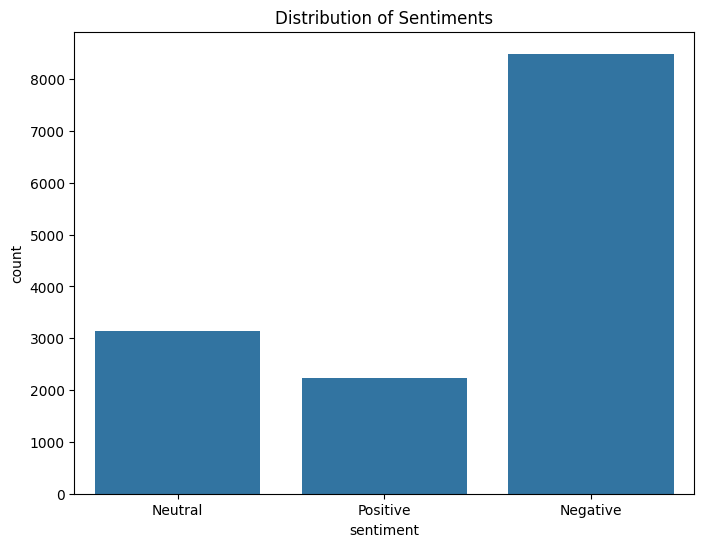

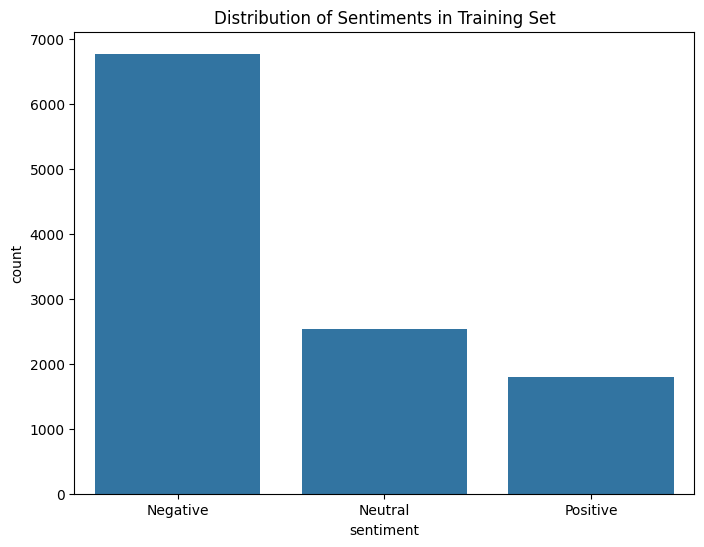

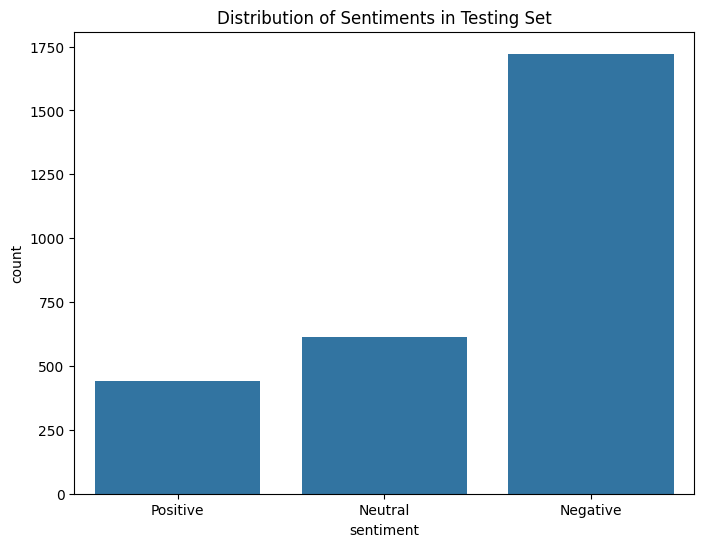

In [29]:
# Data Visualization
# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Visualize the distribution of sentiments in the training set
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_data)
plt.title('Distribution of Sentiments in Training Set')
plt.show()

# Visualize the distribution of sentiments in the testing set
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=test_data)
plt.title('Distribution of Sentiments in Testing Set')
plt.show()


In [53]:
#DISPLAYING TOP WORDS IN EACH SENTIMENT FROM TRAIN DATASET

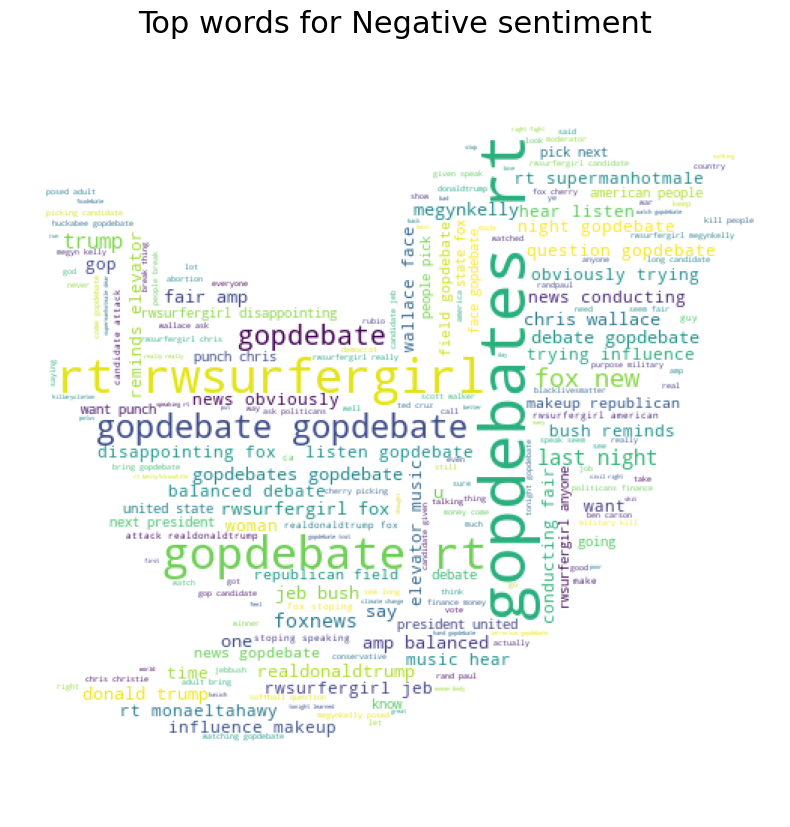

In [45]:
twitter_mask = np.array(Image.open('twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in train_data.loc[train_data['sentiment'] == 'Negative', 'preprocessed_text']))
plt.figure(figsize=(18,10))
plt.title('Top words for Negative sentiment', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

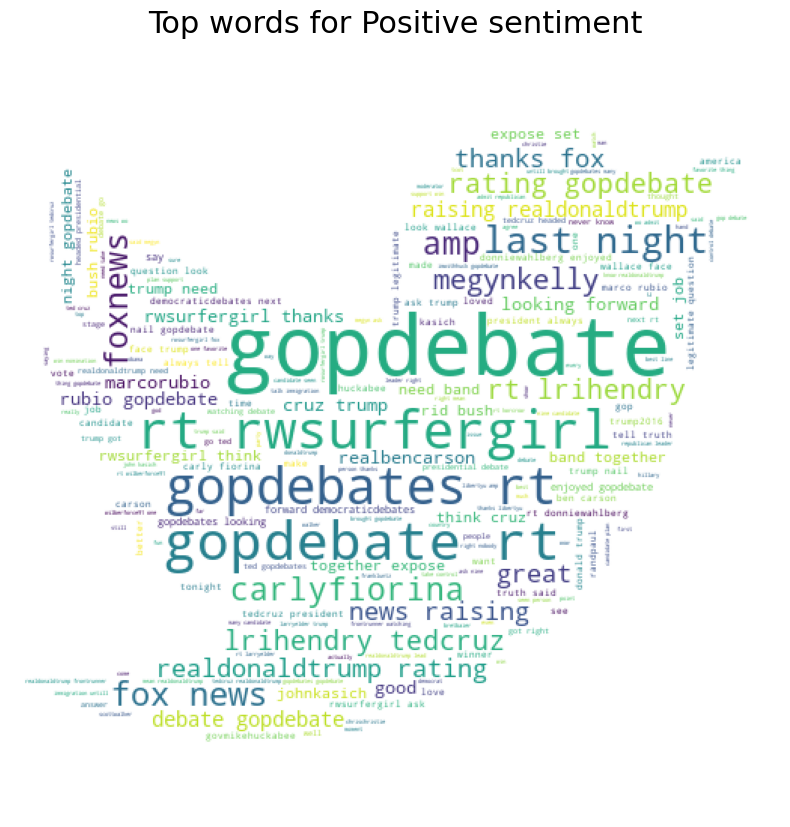

In [43]:
twitter_mask = np.array(Image.open('twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in train_data.loc[train_data['sentiment'] == 'Positive', 'preprocessed_text']))
plt.figure(figsize=(18,10))
plt.title('Top words for Positive sentiment', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

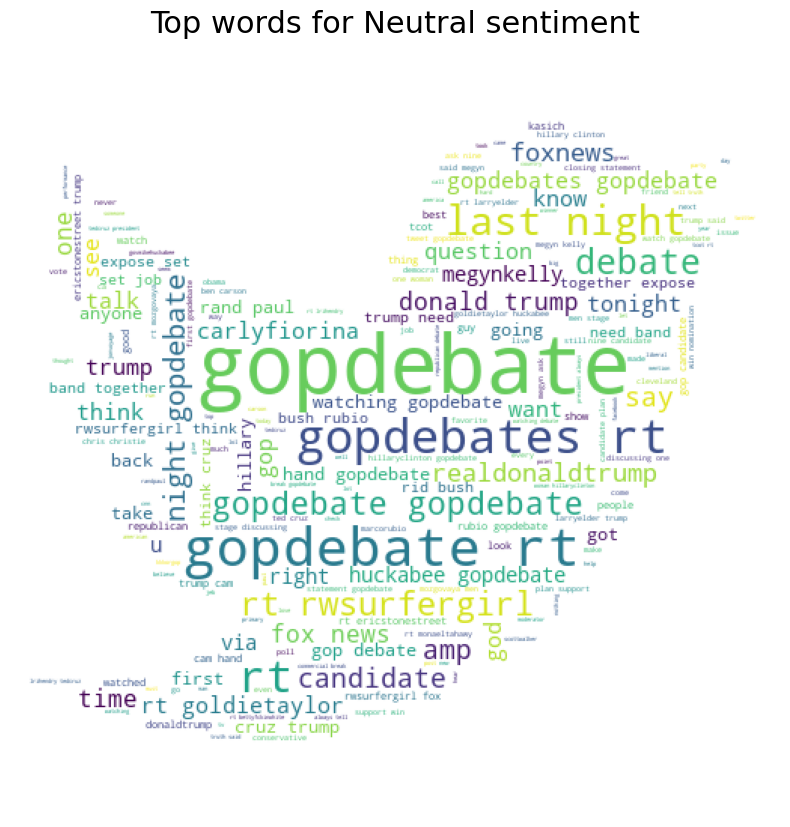

In [44]:
twitter_mask = np.array(Image.open('twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in train_data.loc[train_data['sentiment'] == 'Neutral', 'preprocessed_text']))
plt.figure(figsize=(18,10))
plt.title('Top words for Neutral sentiment', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [30]:
# Convert labels to numerical values using LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_encoded'], test_size=0.2, random_state=42)

# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [31]:
# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


MultinomialNB()

In [46]:
import plotly.figure_factory as ff

x_axes = ['Negative','Neutral','Positive']
y_axes =  ['Positive','Neutral','Negative']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

0.6436036036036036


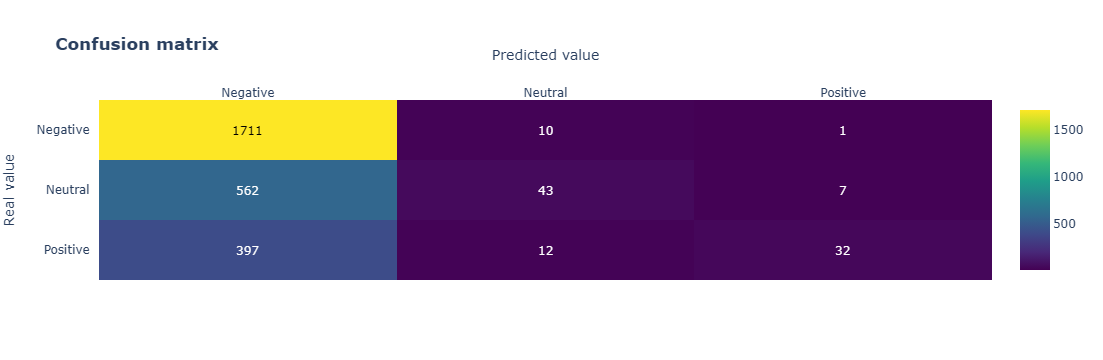

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(X_train)
x_test_dtm = vect.transform(X_test)

# Make class any probability predictions
y_pred_class = clf.predict(x_test_dtm)
y_pred_prob = clf.predict_proba(x_test_dtm)[:, 1]

# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

In [35]:
import joblib
# Save the vectorizer and classifier to files
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(clf, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [33]:
# Make predictions on the test set
predictions = clf.predict(X_test_tfidf)

# Convert numerical predictions back to original labels
predicted_labels = le.inverse_transform(predictions)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, target_names=df['sentiment'].unique())

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.6428828828828829
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.64      0.99      0.78      1722
    Positive       0.68      0.07      0.12       612
    Negative       0.89      0.07      0.13       441

    accuracy                           0.64      2775
   macro avg       0.73      0.38      0.34      2775
weighted avg       0.69      0.64      0.53      2775



In [52]:
#To load the model later on uncomment below 2 lines of code

#loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
#loaded_clf = joblib.load('naive_bayes_model.pkl')

# Now you can use loaded_vectorizer and loaded_clf for predictions
